## Data Preprocessing and Model Training

#### Import Modules 

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

In [274]:
#import data
df = pd.read_csv("/Users/arunekambaram/Downloads/Churn_Modelling.csv")

## Overview of the Dataset

Display the number of rows and columns:

In [275]:
# Print size of data frame
print(
    f"There are {df.shape[0]} rows and {df.shape[1]} columns in the data frame."
)

There are 10000 rows and 14 columns in the data frame.


Display the first few records:

In [276]:
print(df.head())  # Shows first 5 rows


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender Age  Tenure  \
0          1    15634602  Hargrave        619.0    France  Female  42       2   
1          2    15647311      Hill        608.0     Spain  Female  41       1   
2          3    15619304      Onio        502.0    France  Female  42       8   
3          4    15701354      Boni        699.0    France  Female  39       1   
4          5    15737888  Mitchell        850.0     Spain  Female  43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4 

In [277]:
# Show sample rows of  data
df.sample(10, random_state=1)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550.0,France,Male,47,2,0.00,2,1,1,97057.28,0
3850,3851,15775293,Stephenson,680.0,France,Male,34,3,143292.95,1,1,0,66526.01,0
4962,4963,15665088,Gordon,531.0,France,Female,42,2,0.00,2,0,1,90537.47,0
3886,3887,15720941,Tien,710.0,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5437,5438,15733476,Gonzalez,543.0,Germany,Male,30,6,73481.05,1,1,1,176692.65,0
8517,8518,15671800,Robinson,688.0,France,Male,20,8,137624.40,2,1,1,197582.79,0
2041,2042,15709846,Yeh,840.0,France,Female,39,1,94968.97,1,1,0,84487.62,0
1989,1990,15622454,Zaitsev,695.0,Spain,Male,28,0,96020.86,1,1,1,57992.49,0
1933,1934,15815560,Bogle,666.0,Germany,Male,74,7,105102.50,1,1,1,46172.47,0
9984,9985,15696175,Echezonachukwu,602.0,Germany,Male,35,7,90602.42,2,1,1,51695.41,0


Observations:
- The column names all seem fine and do not need modification.
- The column `CustomerId`, `Surname`, and `RowNumber` could be removed
- The values in the column `Gender` are Male or Female, so they could be encoded
- The values in the column `Geography` could be encoded using one hot encoding respectively.



Check the column names and data types:

In [278]:
print(df.columns)  # Displays all column names
print(df.dtypes)   # Data types of each column


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                 object
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Display dataset information:

In [279]:
print(df.info())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9996 non-null   float64
 4   Geography        9999 non-null   object 
 5   Gender           10000 non-null  object 
 6   Age              9995 non-null   object 
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 1.1+ MB
None


Observation from `df.info()`
- Number of non-null values in each column.
- Data types (categorical, numerical, datetime).
- Identify missing values.

In [280]:
# Age column data type is showing up as object, which suggests there is a someother data type other than int present in the column
# Identify the unexpected entry in the int column

del_index_pos =[]
for i in range(len(df)):
    if pd.notna(df["Age"][i]):
        try:
            int(df["Age"][i])
        except ValueError:
            del_index_pos.append(i)
print(df['Age'][del_index_pos])

#Replace the string value into int
#df["Age"][6] = 50
#df["Age"][40] = 40

#Drop the observations
df= df.drop(index=del_index_pos).reset_index(drop=True)

df["Age"] = pd.to_numeric(df["Age"], errors="coerce") 

6     fifty
40    forty
Name: Age, dtype: object


In [281]:
print(df.dtypes)  # Check data types

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


## Explratory Data Analysis

##  Summary Statistics

### Descriptive Statistics for Numerical Features

In [282]:
df.describe().T  # Summary statistics for numerical columns


,count,mean,std,min,25%,50%,75%,max
RowNumber,9998.0,5.001495e+03,2886.326100,1.00,2.502250e+03,5001.50,7.500750e+03,10000.00
CustomerId,9998.0,1.569096e+07,71933.084126,15565701.00,1.562856e+07,15690743.50,1.575324e+07,15815690.00
CreditScore,9994.0,6.505444e+02,96.633570,350.00,5.840000e+02,652.00,7.177500e+02,850.00
Age,9993.0,3.892325e+01,10.488547,18.00,3.200000e+01,37.00,4.400000e+01,92.00
Tenure,9998.0,5.012703e+00,2.892378,0.00,3.000000e+00,5.00,7.000000e+00,10.00
Balance,9998.0,7.649099e+04,62398.434951,0.00,0.000000e+00,97198.54,1.276478e+05,250898.09
NumOfProducts,9998.0,1.530206e+00,0.581669,1.00,1.000000e+00,1.00,2.000000e+00,4.00
HasCrCard,9998.0,7.054411e-01,0.455867,0.00,0.000000e+00,1.00,1.000000e+00,1.00
IsActiveMember,9998.0,5.151030e-01,0.499797,0.00,0.000000e+00,1.00,1.000000e+00,1.00
EstimatedSalary,9998.0,1.001022e+05,57508.416335,11.58,5.101247e+04,100218.21,1.493959e+05,199992.48


Observations from `df.describe`

- Count – Number of non-null values.
- Mean, Standard Deviation – Central tendency and dispersion.
- Min, Max, Quartiles (25%, 50%, 75%) – Helps detect outliers.

## Descriptive Statistics for Categorical Features

In [283]:
# Check statistical summary 
df.describe(include=["object"]).T

,count,unique,top,freq
Surname,9998,2932,Smith,32
Geography,9997,3,France,5013
Gender,9998,2,Male,5455


### Identify unique values of categorical data columns

In [284]:
cat_cols = df.select_dtypes(include="object").columns  # columns of object data type

for col in cat_cols:
    print("Unique values in the column", col, "are:")
    print(df[col].value_counts())
    print("=" * 60)

Unique values in the column Surname are:
Surname
Smith                      32
Martin                     29
Scott                      29
Walker                     28
Brown                      26
Yeh                        25
Genovese                   25
Shih                       25
Wright                     24
Maclean                    24
White                      23
Wilson                     23
Ma                         23
Fanucci                    23
Lu                         22
Moore                      22
Johnson                    22
Wang                       22
Chu                        22
Sun                        21
Mai                        21
Thompson                   21
McGregor                   21
Kao                        20
Jamieson                   20
Palerma                    20
Lo                         20
Trevisani                  20
Watson                     20
Fang                       20
Hughes                     20
Kennedy              

## Drop Unecessary Columns

In [285]:
# Drop case_id column before EDA, as it has no meaning for analyses and modeling
df.drop(["CustomerId", "RowNumber","Surname"], axis=1, inplace=True)

In [286]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


## Identifying Missing Values

### Detecting Missing Values  for Categorical Features

In [287]:
#### let us capture all the nan values
#first lets handle categorical features which are missing

features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtypes == 'O' ]

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Geography: 0.0001% missing values


### Detecting Missing Values  for Numerical Features

In [288]:
#now lets check for numerical variables the contains missing values

numerical_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes != 'O']

#Printing the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

CreditScore: 0.0004% missing values
Age: 0.0005% missing values


## Visualising Missing values

<Axes: xlabel='CreditScore', ylabel='Count'>

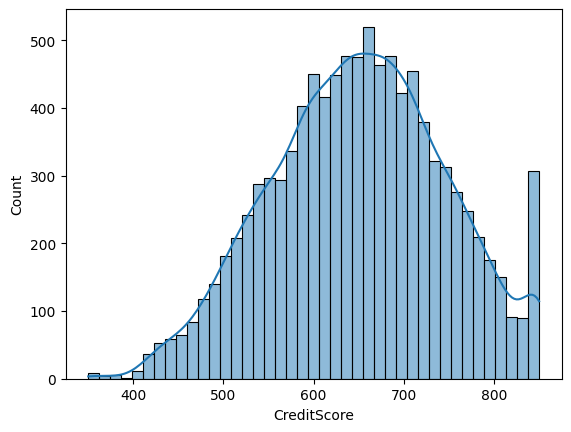

In [289]:
sns.histplot(df['CreditScore'],kde=True)

In [290]:
print(df["CreditScore"].skew())
#To test for normal distribution we can use 
#1) Shapiro-Wilk Test
#2) Kolmogorov-Smirnov test

-0.0717323667688559


1.011852269563523


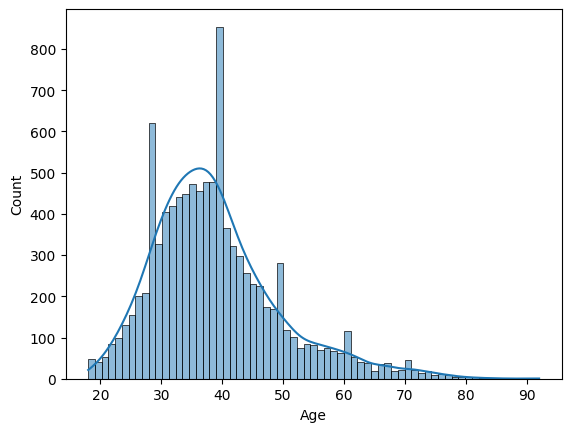

In [291]:
sns.histplot(df['Age'],kde=True)
print(df["Age"].skew()) # Positive skewed data

## Identifying Duplicate Records

In [292]:
# Check for duplicate rows
dplct_no = df.duplicated().sum()
print(f"There are {dplct_no} duplicate rows in the data.")



There are 0 duplicate rows in the data.


 ## Visualizing Data Distribution

### Univariate Analysis (Single Feature Distribution)


### Numerical Features

In [293]:
#Get all Numerical features
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
#printing number numerical variable
print("number of numerical variable {}".format(len(numerical_features)))
#print sample of the numerical features
df[numerical_features].head()

number of numerical variable 9


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,43.0,2,125510.82,1,1,1,79084.10,0


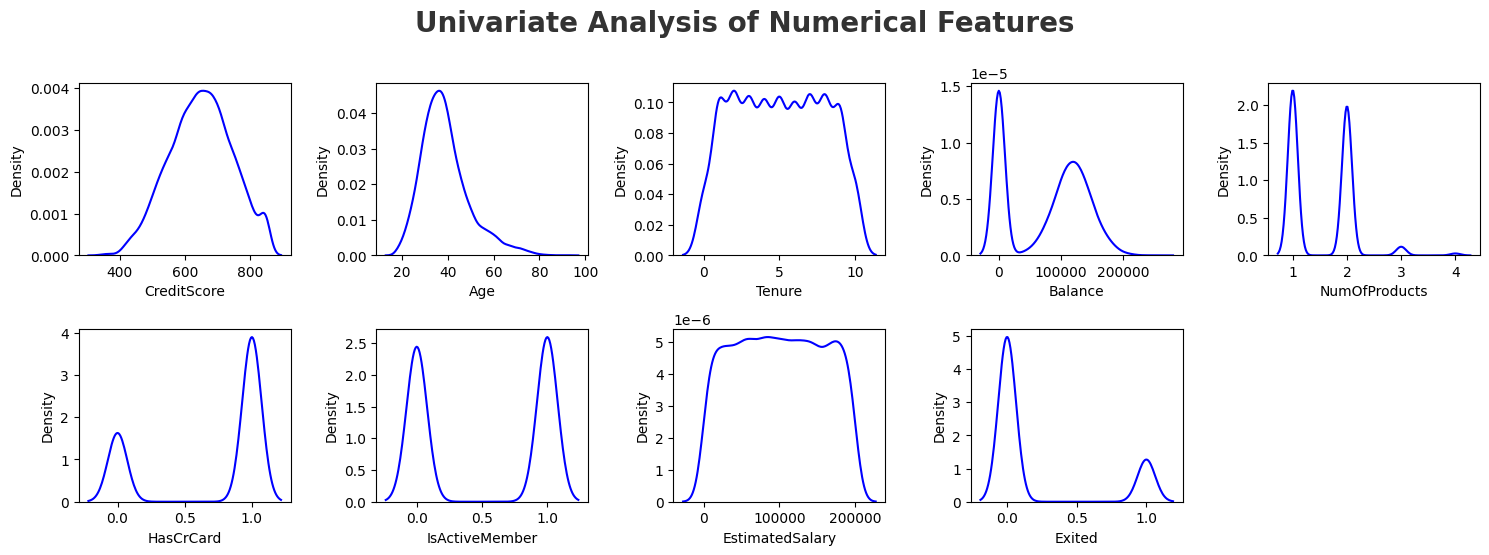

In [294]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(4, 5, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Discrete Features

In [319]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())< 25 and feature not in ["CustomerId"]]
print("Discrete variable count {}".format(len(discrete_feature)))
print(df[discrete_feature].head())


Discrete variable count 4
   Tenure  NumOfProducts  HasCrCard  IsActiveMember
0       2              1          1               1
1       1              1          0               1
2       8              3          1               0
3       1              2          0               0
4       2              1          1               1


### Continuous Features

In [320]:
#Continuous variables
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + ['CustomerId']]
print("continuous features count: {} ".format(len(continuous_feature)))
print(df[continuous_feature].head())


continuous features count: 4 
   CreditScore   Age    Balance  EstimatedSalary
0        619.0  42.0       0.00        101348.88
1        608.0  41.0   83807.86        112542.58
2        502.0  42.0  159660.80        113931.57
3        699.0  39.0       0.00         93826.63
4        850.0  43.0  125510.82         79084.10


Histogram (Distribution of Values):

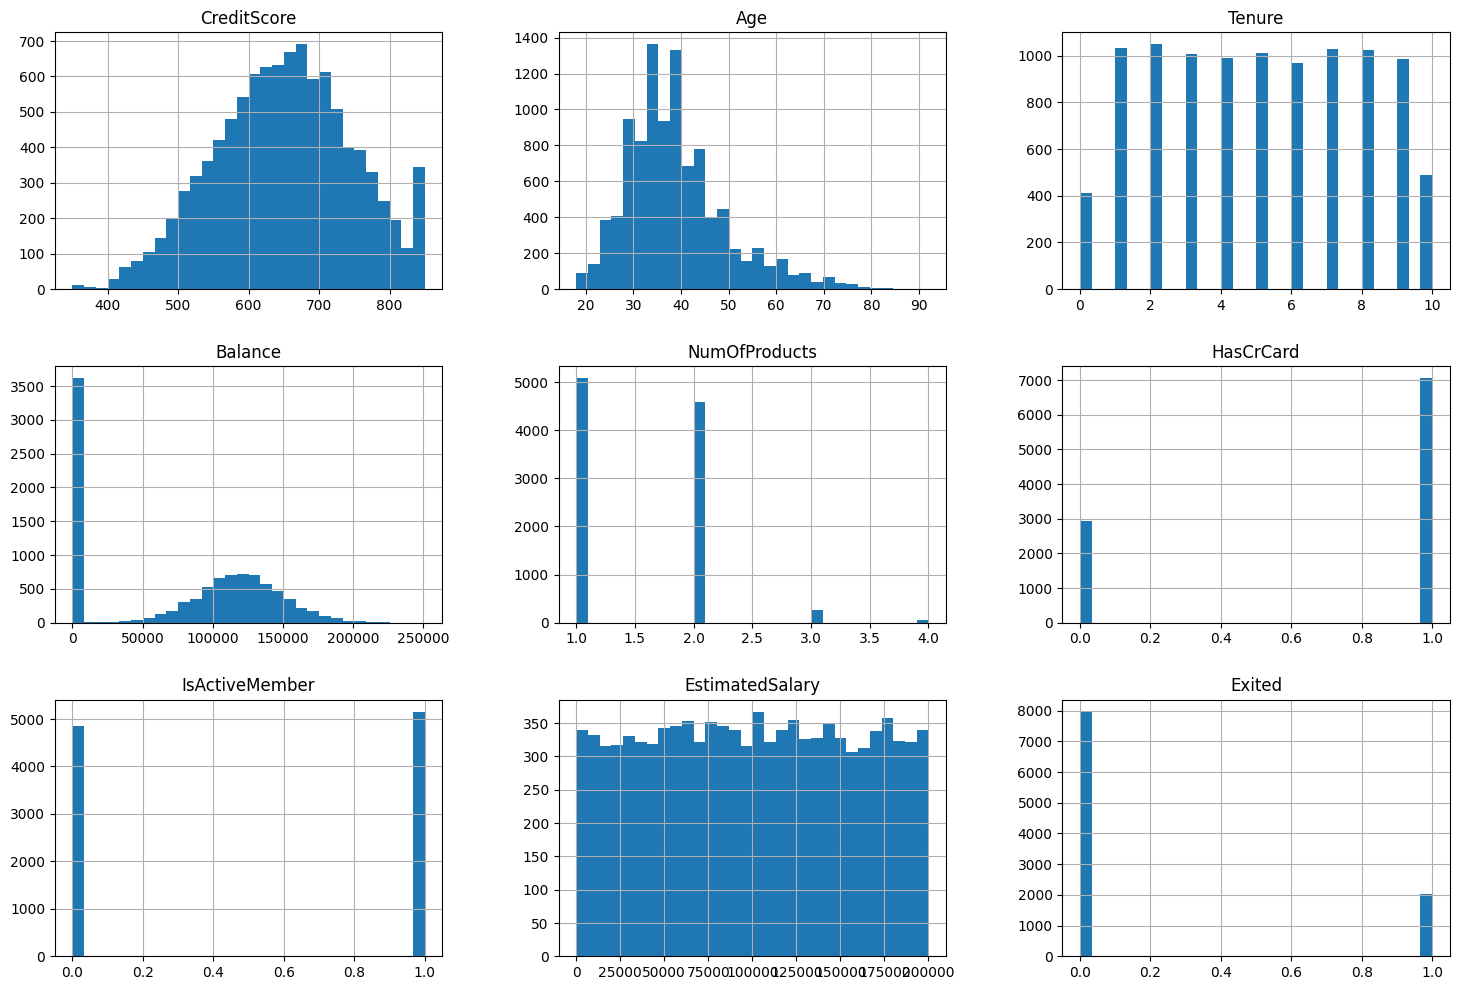

In [295]:
df.hist(figsize=(18,12), bins=30)
plt.show()


 ### Box Plot (Detect Outliers):

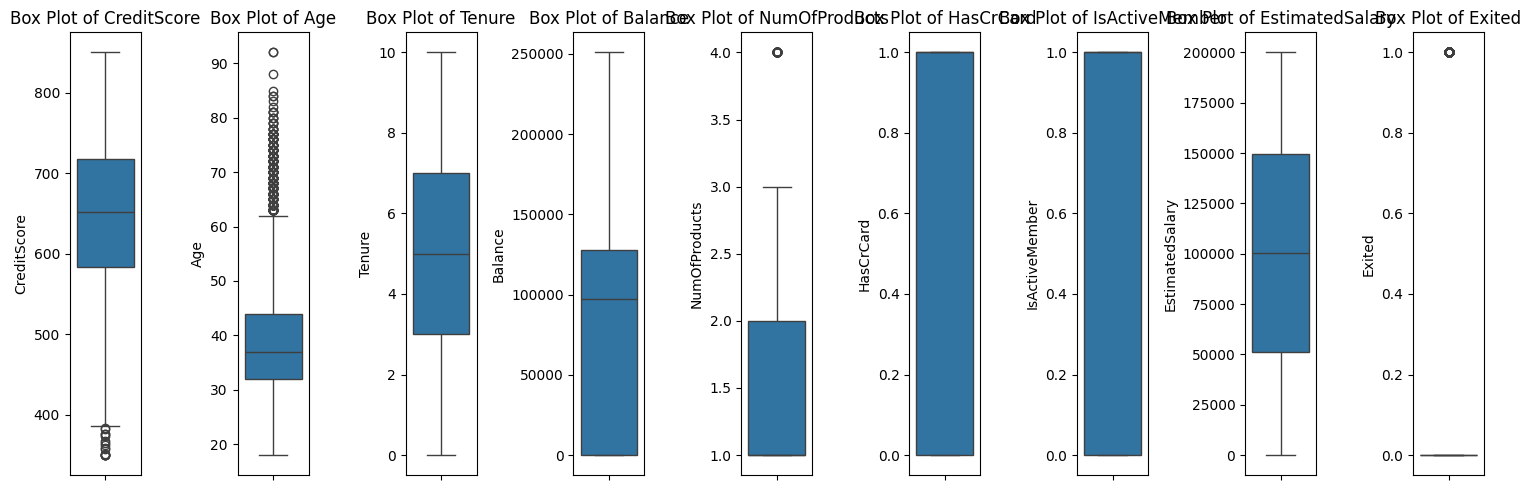

In [296]:
num_features = len(numerical_features)
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

## For Categorical Data

In [297]:
#Categorical variables
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
for feature in categorical_feature:
    print("the feature is {} and number of categories are {}".format(feature, len(df[feature].unique())))
print(df[categorical_feature].head(3))

the feature is Geography and number of categories are 4
the feature is Gender and number of categories are 2
  Geography  Gender
0    France  Female
1     Spain  Female
2    France  Female


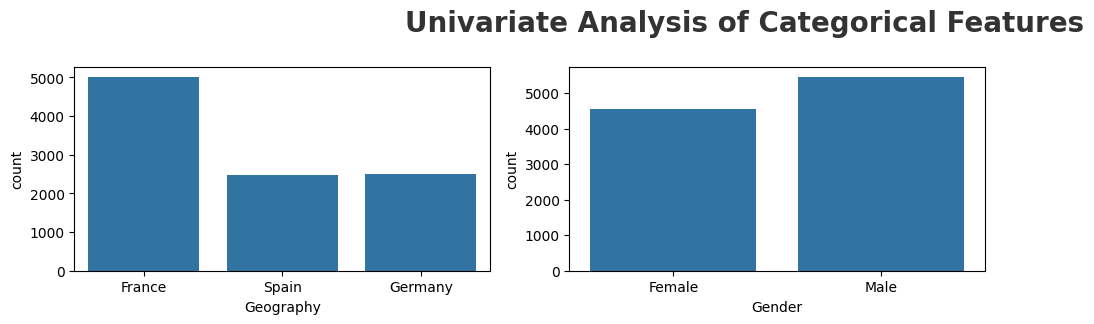

In [298]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_feature)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_feature[i]])
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()
    


## Identifying Relationships Between Features (Multivariate Analysis)

## Correlation Between Numerical Features

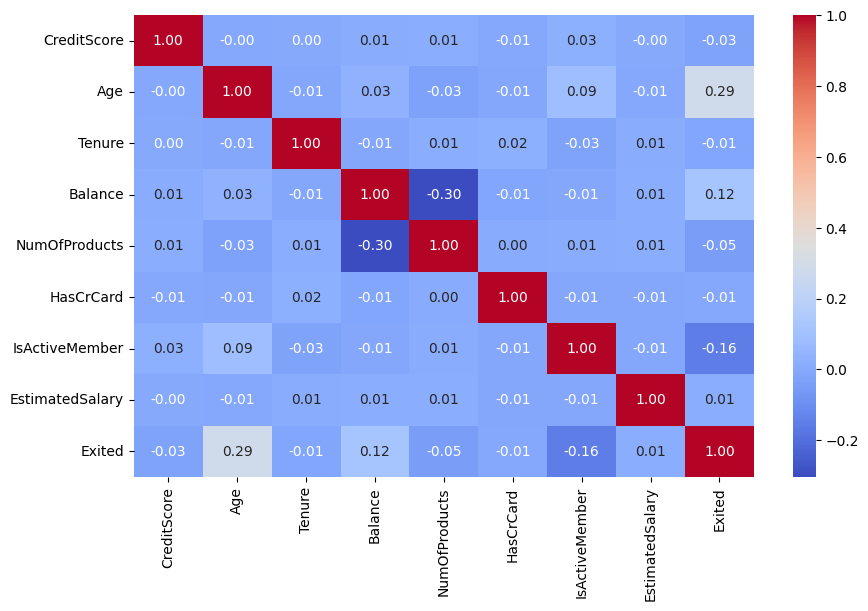

In [299]:
import seaborn as sns
corr = df[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


Observation:

- High correlation (>0.85): Possible multicollinearity.
- Low correlation (~0): Features may be independent.


## Check Multicollinearity in Numerical features


In [300]:
df[numerical_features].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004459,0.000450,0.006630,0.012064,-0.005865,0.025464,-0.001289,-0.027202
Age,-0.004459,1.000000,-0.010036,0.028284,-0.030567,-0.011532,0.085492,-0.007301,0.285359
Tenure,0.000450,-0.010036,1.000000,-0.012270,0.013358,0.022563,-0.028469,0.007874,-0.013984
Balance,0.006630,0.028284,-0.012270,1.000000,-0.304373,-0.014449,-0.009925,0.012601,0.118504
NumOfProducts,0.012064,-0.030567,0.013358,-0.304373,1.000000,0.003190,0.009441,0.014286,-0.047830
HasCrCard,-0.005865,-0.011532,0.022563,-0.014449,0.003190,1.000000,-0.011863,-0.009800,-0.007073
IsActiveMember,0.025464,0.085492,-0.028469,-0.009925,0.009441,-0.011863,1.000000,-0.011326,-0.156151
EstimatedSalary,-0.001289,-0.007301,0.007874,0.012601,0.014286,-0.009800,-0.011326,1.000000,0.011993
Exited,-0.027202,0.285359,-0.013984,0.118504,-0.047830,-0.007073,-0.156151,0.011993,1.000000


## Check Multicollinearity for Categorical features


- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (H0
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1
): The Feature and Target column are not independent (Correalted)

In [301]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_feature:
    if chi2_contingency(pd.crosstab(df['Exited'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_feature, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Geography,Reject Null Hypothesis
1,Gender,Reject Null Hypothesis


### Checking for Class Imbalance (For Classification Problems)

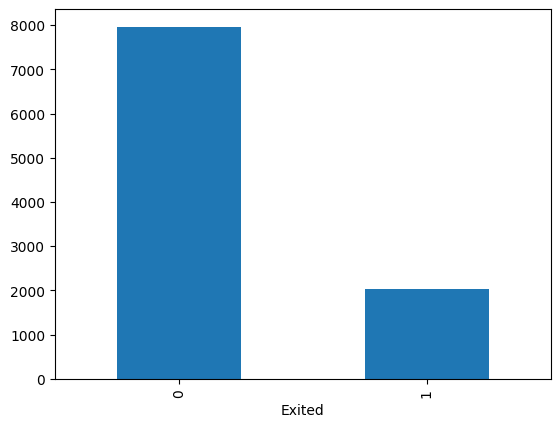

In [302]:
df['Exited'].value_counts().plot(kind='bar')
plt.show()


Using Pie Chart:

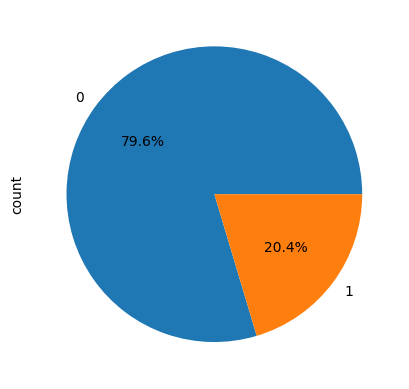

In [303]:
df['Exited'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()


Why It Matters?

- Imbalanced datasets affect model performance.

Solutions: SMOTE, Class Weights, Oversampling/Undersampling.

## Handling Missing Values

 ### Identifying Missing Values

In [304]:
#replacing the numerical missing values
#so whenver there is outliers you should replace the missing values with median or mode

for feature in numerical_with_nan:
    #we will replace by using median since there are outliers
    median_value = df[feature].median()
    
    #create a new feature to capture nan values
    
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

CreditScore    0
Age            0
dtype: int64

In [305]:
#replace missing values with a new label

def replace_cat_feature(dataset,features_nan):
    data = dataset.copy()
    data[features_nan] = data[features_nan].fillna('Missing')
    return data

dataset = replace_cat_feature(df,features_nan)
dataset[features_nan].isnull().sum()

Geography    0
dtype: int64

## Handling Duplicate Data

In [306]:
print(df.duplicated().sum())  # Count duplicate rows
    

0


In [307]:
df[df.duplicated()]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScorenan,Agenan


### Removing Duplicates

In [308]:
df = df.drop_duplicates()


Why It Matters?

- Removing duplicates reduces bias in machine learning models.
- Prevents overfitting due to repeated data points.


## Handling Outliers

### Detecting Outliers

 Using IQR (Interquartile Range) Method

In [309]:
outlier_indices = []
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_indices.extend(outliers.index.tolist())
    return outliers


# Find outliers for each numerical column
for col in df[numerical_features].columns:
    detect_outliers_iqr(df, col)

# Get unique index positions (remove duplicates)
unique_outliers = list(set(outlier_indices))

print(outlier_indices)
print(len(outlier_indices))

# Remove outliers from the DataFrame
df_1 = df.drop(unique_outliers)

[6, 940, 1191, 1403, 1629, 1836, 1960, 2471, 2577, 5492, 8152, 8721, 8760, 9208, 9354, 9622, 56, 83, 102, 156, 179, 228, 232, 241, 250, 308, 362, 369, 383, 397, 557, 565, 600, 610, 656, 676, 734, 764, 767, 805, 809, 821, 857, 882, 886, 946, 950, 955, 961, 967, 1007, 1037, 1038, 1053, 1203, 1232, 1233, 1244, 1250, 1276, 1283, 1340, 1385, 1405, 1408, 1437, 1455, 1517, 1541, 1605, 1612, 1788, 1808, 1864, 1899, 1902, 1905, 1931, 1979, 2000, 2010, 2037, 2051, 2076, 2092, 2106, 2152, 2157, 2162, 2242, 2272, 2431, 2456, 2457, 2551, 2613, 2668, 2711, 2715, 2758, 2770, 2776, 2789, 2853, 2875, 2899, 2906, 2923, 2924, 3031, 3052, 3108, 3140, 3190, 3201, 3227, 3309, 3312, 3315, 3344, 3364, 3366, 3376, 3380, 3382, 3385, 3394, 3432, 3495, 3497, 3525, 3529, 3539, 3557, 3571, 3573, 3600, 3644, 3645, 3649, 3688, 3689, 3700, 3726, 3731, 3759, 3811, 3824, 3878, 3879, 3886, 3907, 3908, 3925, 3938, 3978, 3992, 4008, 4023, 4046, 4049, 4140, 4145, 4160, 4168, 4239, 4242, 4254, 4271, 4295, 4311, 4316, 4333, 4

## Feature Extraction

### Extracting Features from Categorical Data

#### Preprocessing using Column Transformer

In [310]:
X = df.drop('Exited', axis=1)
y = df['Exited']

## Encoding (For Categorical Data)  and Standardization (For Numerical Data)

## Creating a Column Transformer for Data Preprocessing

- `OneHotEncoder`: Converts categorical variables into binary columns
- `StandardScaler`: Standardizes numerical features to have mean = 0 and variance = 1

-  Use StandardScaler → When data follows a normal distribution
-  Use MinMaxScaler → When data should be between 0 and 1

In [311]:
# Create Column Transformer 
oh_columns = ['Gender','Geography']


from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

In [312]:

X = preprocessor.fit_transform(X)

In [313]:
X

array([[ 1.        ,  0.        ,  1.        , ...,  0.64618327,
         0.97023668,  0.02167863],
       [ 1.        ,  0.        ,  0.        , ..., -1.54754858,
         0.97023668,  0.21633292],
       [ 1.        ,  0.        ,  1.        , ...,  0.64618327,
        -1.03067635,  0.24048694],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.54754858,
         0.97023668, -1.00888816],
       [ 0.        ,  1.        ,  0.        , ...,  0.64618327,
        -1.03067635, -0.12544389],
       [ 1.        ,  0.        ,  1.        , ...,  0.64618327,
        -1.03067635, -1.07661728]])

##  Handling Imbalanced Data (For Classification Problems)

### Oversampling Minority Class (SMOTE):

In [314]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split

In [315]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((9779, 14), (2445, 14))

In [316]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 


In [317]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7903
- F1 score: 0.7899
- Precision: 0.8071
- Recall: 0.8262
- Roc Auc Score: 0.7849
----------------------------------
Model performance for Test set
- Accuracy: 0.7808
- F1 score: 0.7805
- Precision: 0.8003
- Recall: 0.8142
- Roc Auc Score: 0.7759


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9129
- F1 score: 0.9128
- Precision: 0.9176
- Recall: 0.9289
- Roc Auc Score: 0.9106


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9603
- F1 score: 0.9603
- Precision: 0.9598
- Recall: 0.9702
- Roc Auc Score: 0.9589


Gradient Boost
Model performance for Training se

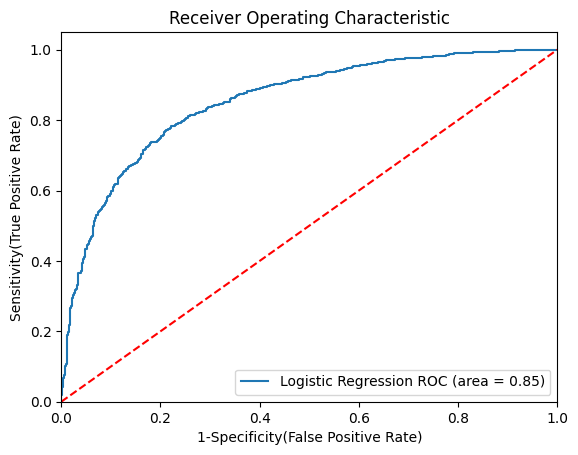

In [318]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
        'label': 'Logistic Regression',
        'model': LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=500),
        'auc': 0.85  # Example AUC, update with actual value

},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 